<a href="https://colab.research.google.com/github/DiegoDwt/SistemaFuzzy/blob/main/SistemaFuzzy_ControleDeTemperatura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=c878795779eea5f4433b0c91f169476e661f867830eb45eddbf092f365f6af49
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


Valor de saída defuzzificado = 50.00
Sugerindo um ajuste de controle do forno de 50.00%


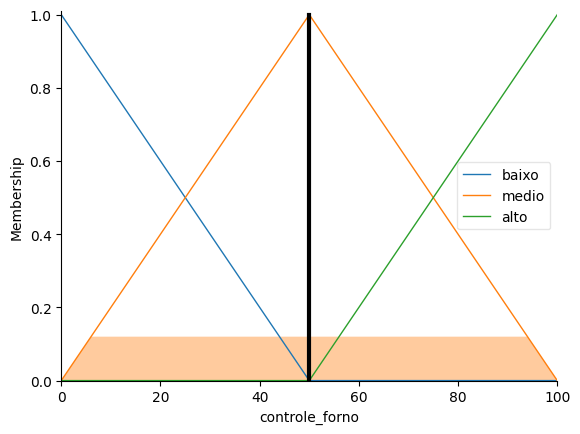

In [ ]:
# Importar as bibliotecas necessárias
import numpy as np
import skfuzzy as fz
from skfuzzy import control as cf

# Definição das variáveis linguísticas de ENTRADA e de SAÍDA
temperatura_atual = cf.Antecedent(np.arange(0, 501, 1), 'temperatura_atual')
temperatura_desejada = cf.Antecedent(np.arange(0, 501, 1), 'temperatura_desejada')
controle_forno = cf.Consequent(np.arange(0, 101, 1), 'controle_forno')

# Geração automática de conjuntos difusos com 3 termos: Baixo, Médio e Alto
temperatura_atual.automf(3)
temperatura_desejada.automf(3)

# Parametrização dos Conjuntos Difusos da variável de Saída
controle_forno['baixo'] = fz.trimf(controle_forno.universe, [0, 0, 50])
controle_forno['medio'] = fz.trimf(controle_forno.universe, [0, 50, 100])
controle_forno['alto'] = fz.trimf(controle_forno.universe, [50, 100, 100])

# Definição das Regras de Inferência Fuzzy
r1 = cf.Rule(temperatura_atual['poor'] & temperatura_desejada['good'], controle_forno['alto'])
r2 = cf.Rule(temperatura_atual['good'] & temperatura_desejada['poor'], controle_forno['baixo'])
r3 = cf.Rule(temperatura_atual['average'], controle_forno['medio'])

# Criação do Sistema de Controle e Simulação
sistema_controle = cf.ControlSystem([r1, r2, r3])
simulacao_controle = cf.ControlSystemSimulation(sistema_controle)

# Entrada de dados para simulação
simulacao_controle.input['temperatura_atual'] = 30
simulacao_controle.input['temperatura_desejada'] = 100

# Processamento e defuzzificação
simulacao_controle.compute()

# Saída formatada
temperatura_forno = simulacao_controle.output['controle_forno']
print(f"Valor de saída defuzzificado = {temperatura_forno:.2f}")
print(f"Sugerindo um ajuste de controle do forno de {temperatura_forno:.2f}%")

# Visualização gráfica
controle_forno.view(sim=simulacao_controle)


